#Banking & Financial Marketing

Domain :- Banking , Finance Marketing

About the dataset:- Details of clients  who had purchased some long term investment bond or made investment in long termFixed deposit etc.


Assignment:-
    (A)Preprocessing-
    (1)Handling  Missing value-- Apply Imputation and Drop approach.
    (2)Outlier treatment- apply trimming and capping approach
    (3)label_Encoding/astype approach.
    (4)One_hot encoding approach
    

In [ ]:
Dataset detail:-
    
# Independent variables:

# age : age of the client 
# job : type of the job 
# marital : marital status
# education : level of education 
# default : loan defaulter or not
# balance : bank balance in dollers
# housing : client have the house loan or not
# loan : client have the personal loan or not 
# contact : type of the contact of the client  
# day : last contact day of the client 
# month : last contact month of the client 
# duration : call duartion with the client(in sec's)
# campaign : no of times contacted with client in the entire campaign 
# pdays : no of days before client contacted 
# previous : no of times contacted with client in the before the campaign
# poutcome : outcome of the previous marketing campaign

# ------------------------------------------------------------------------------------------------------
# Dependent variable:

# Target : product subscribed or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv(r"C:\Users\Kriti\Banking_finance.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

# Handling Missing value-- Apply Imputation Method

In [11]:
df1=df.copy()

In [12]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df1["duration"]=df1["duration"].fillna(df1["duration"].median())

In [14]:
df1["education"]=df1["education"].fillna(df1["education"].mode()[0])

In [15]:
df1["poutcome"]=df1["poutcome"].fillna(df1["poutcome"].mode()[0])

In [16]:
df1["balance"]=df1["balance"].fillna(df1["balance"].mean())

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# handling  multiple numerical columns & categorical columns

In [18]:
df2=df.copy()

In [19]:
num_cols=["balance","age"]

In [20]:
df2[num_cols]=df2[num_cols].fillna(df2[num_cols].mean())

In [21]:
cat_col=["job","marital","education","contact"]

In [22]:
df2[cat_col]=df2[cat_col].fillna(df2[cat_col].mode().iloc[0])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Handling Missing value-- Apply Dropping Method

In [24]:
df3=df.copy()

In [25]:
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
df3.dropna(inplace=True)

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Trimming Method

In [28]:
df4=df.copy()

In [29]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:>

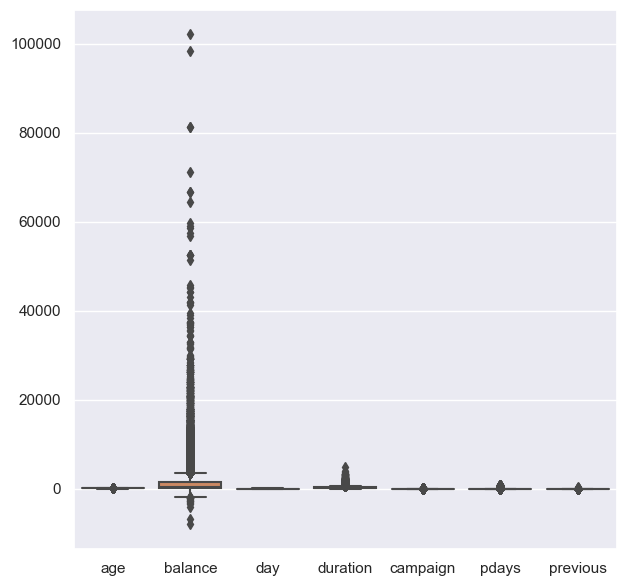

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df)

In [31]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper_fence \n",Upper_fence)
print("Lower_fence \n",Lower_fence)

Upper_fence 
 age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64
Lower_fence 
 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64


In [32]:
df4=df[~((df<Lower_fence)|(df>Upper_fence)).any(axis=1)]

In [33]:
df4.describe()

,age,balance,day,duration,campaign,pdays,previous
count,28193.000000,28193.000000,28193.000000,28193.000000,28193.000000,28193.0,28193.0
mean,40.373639,606.670344,15.775015,205.355833,2.189692,-1.0,0.0
std,9.884503,831.950484,8.356767,139.320091,1.341640,0.0,0.0
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,31.000000,8.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,317.000000,16.000000,169.000000,2.000000,-1.0,0.0
75%,48.000000,920.000000,22.000000,277.000000,3.000000,-1.0,0.0
max,70.000000,3462.000000,31.000000,643.000000,6.000000,-1.0,0.0


In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28193 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        28193 non-null  int64 
 1   job        28193 non-null  object
 2   marital    28193 non-null  object
 3   education  28193 non-null  object
 4   default    28193 non-null  object
 5   balance    28193 non-null  int64 
 6   housing    28193 non-null  object
 7   loan       28193 non-null  object
 8   contact    28193 non-null  object
 9   day        28193 non-null  int64 
 10  month      28193 non-null  object
 11  duration   28193 non-null  int64 
 12  campaign   28193 non-null  int64 
 13  pdays      28193 non-null  int64 
 14  previous   28193 non-null  int64 
 15  poutcome   28193 non-null  object
 16  Target     28193 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.9+ MB


# Capping Method

In [35]:
df5=df.copy()    

In [36]:
df5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper_fence \n",Upper_fence)
print("Lower_fence \n",Lower_fence)

Upper_fence 
 age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64
Lower_fence 
 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64


In [38]:
df5['age']=np.where(df5['age']>70.5,70.5,np.where(df5['age']<10.5,10.5,df5['age']))

In [39]:
df5['balance']=np.where(df5['balance']>3462.0,3462.0,np.where(df5['balance']<0,0,df5['balance']))

In [40]:
df5['day']=np.where(df5['day']>40.5,40.5,np.where(df5['day']<0,0,df5['day']))

In [41]:
df5['duration']=np.where(df5['duration']>643.0,643.0,np.where(df5['duration']<0,0,df5['duration']))

In [42]:
df5['campaign']=np.where(df5['campaign']>6.0,6.0,np.where(df5['campaign']<0,0,df5['campaign']))

In [43]:
df5['pdays']=np.where(df5['pdays']>-1.0,-1.0,np.where(df5['pdays']<0,0,df5['pdays']))

In [44]:
df5['previous']=np.where(df5['previous']>0.0,0.0,np.where(df5['previous']<0,0,df5['previous']))

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  Target     45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


# As type method

In [46]:
df6=df.copy()

In [47]:
df6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
df6['job']=df6['job'].astype('category').cat.codes

In [49]:
df6['marital']=df6['marital'].astype('category').cat.codes

In [50]:
df6['education']=df6['education'].astype('category').cat.codes

In [51]:
df6['default']=df6['default'].astype('category').cat.codes

In [52]:
df6['housing']=df6['housing'].astype('category').cat.codes

In [53]:
df6['loan']=df6['loan'].astype('category').cat.codes

In [54]:
df6['contact']=df6['contact'].astype('category').cat.codes

In [55]:
df6['month']=df6['month'].astype('category').cat.codes

In [56]:
df6['poutcome']=df6['poutcome'].astype('category').cat.codes

In [57]:
df6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


# One_hot encoding approach

In [58]:
df7=df.copy()

In [59]:
df7.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
df7=pd.get_dummies(df7,columns=["job","education"],prefix=["profile","Edu_Field"])

In [61]:
df7.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,profile_self-employed,profile_services,profile_student,profile_technician,profile_unemployed,profile_unknown,Edu_Field_primary,Edu_Field_secondary,Edu_Field_tertiary,Edu_Field_unknown
0,58,married,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,single,no,29,yes,no,unknown,5,may,151,...,0,0,0,1,0,0,0,1,0,0
2,33,married,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,1,0,0
3,47,married,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,0,1
4,33,single,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,1,0,0,0,1


# Data Analysis 

In [62]:
Client_data=df.copy()

In [63]:
Client_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


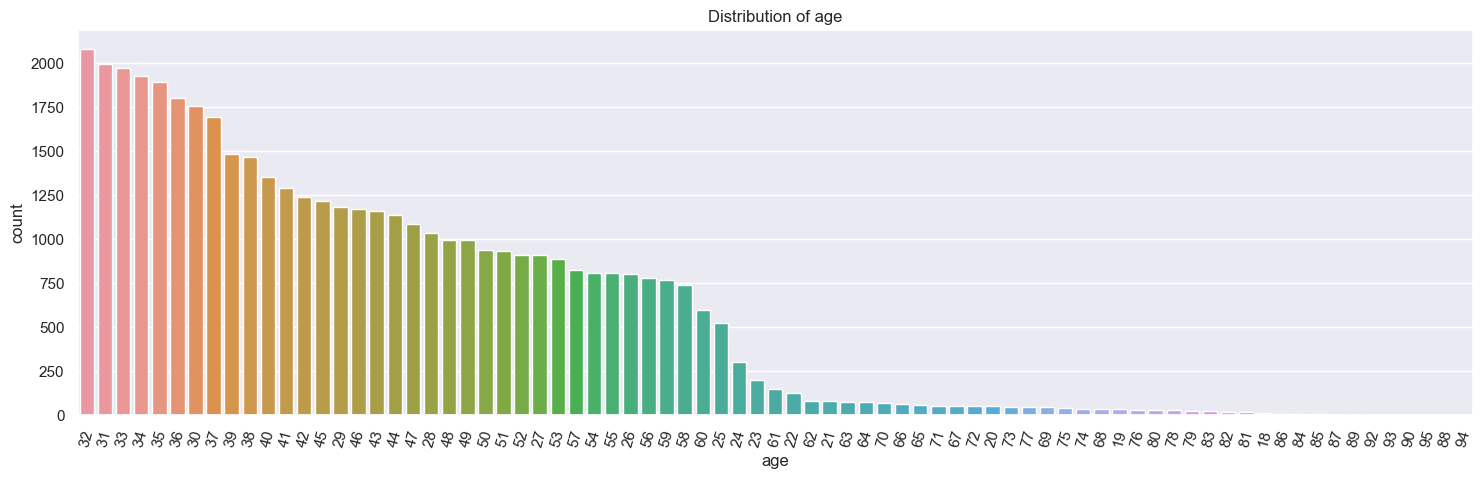

In [64]:
plt.figure(figsize=(18,5))
sns.countplot(x="age",data=Client_data,order=Client_data["age"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Distribution of age")
plt.show()

As per above graph the clients who had purchased some long term investment bond mostly fall under the range between 30 - 60 years old.

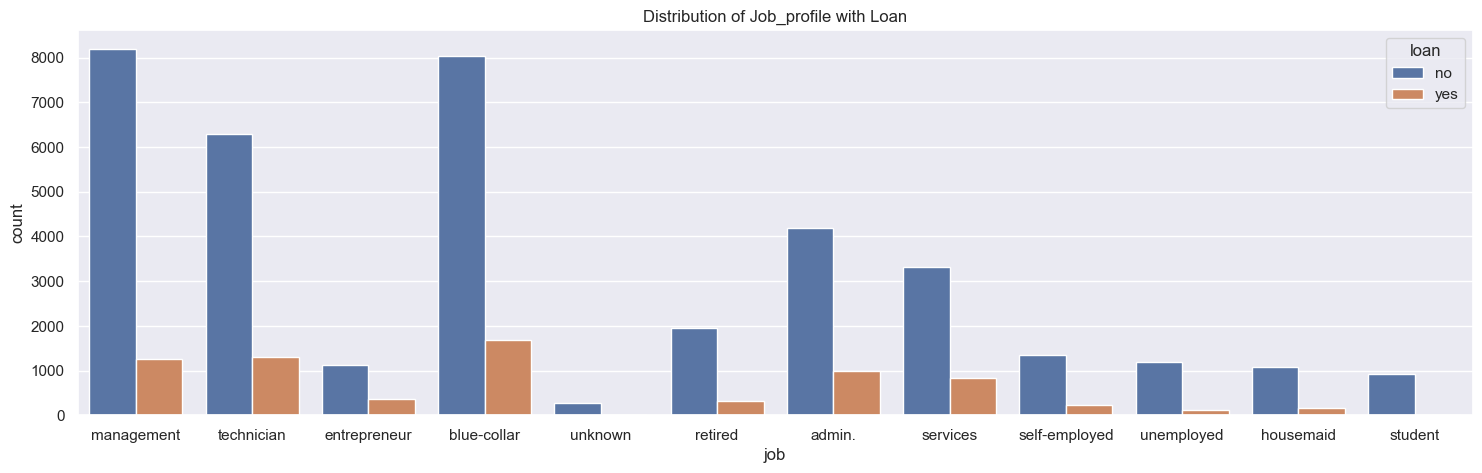

In [65]:
plt.figure(figsize=(18,5))
sns.countplot(x="job",data=Client_data,hue="loan")

plt.title("Distribution of Job_profile with Loan")
plt.show()

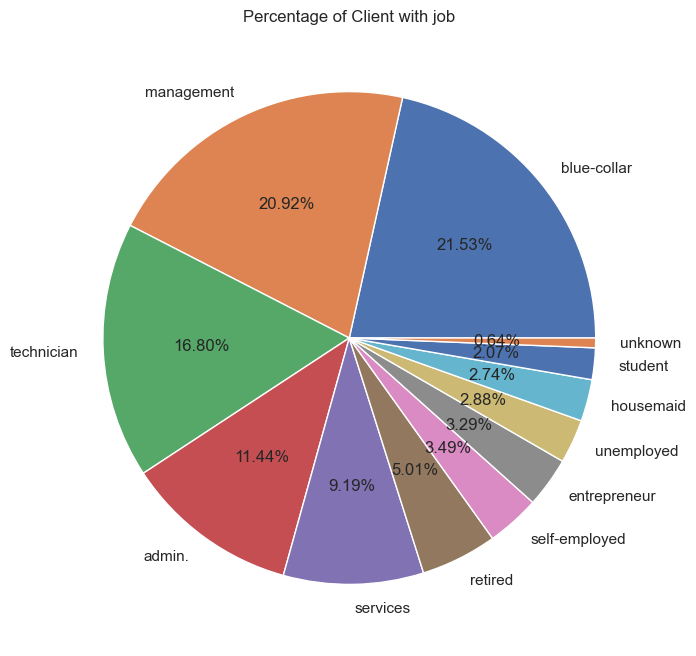

In [66]:
plt.figure(figsize=(8,8))
plt.pie(x=Client_data["job"].value_counts(),labels=Client_data["job"].value_counts().index,autopct='%0.2f%%',data=Client_data)
plt.title('Percentage of Client with job')
plt.show()

The Pie chart is distribution of those clients who has different job profile.
1. The client who fall under Blue-collar job profile has highest percentage among others i.e; 21.53%.
2. The 20.92% client fall under managemant category, 16.80% clients are under Technician category, 11.44% clients are works in 
   admin department and 9.19% are in service category.
3. The category of retired clients contain 5.01%.
4. Another job categories are: 3.49% are self-employed, 3.29% are entrepreneur, 2.88% are unemploymed, 2.74% are housmaid, 2.07%
   are student and 0.64% clients are under unknown category.

Text(0.5, 0, 'Figure No 4')

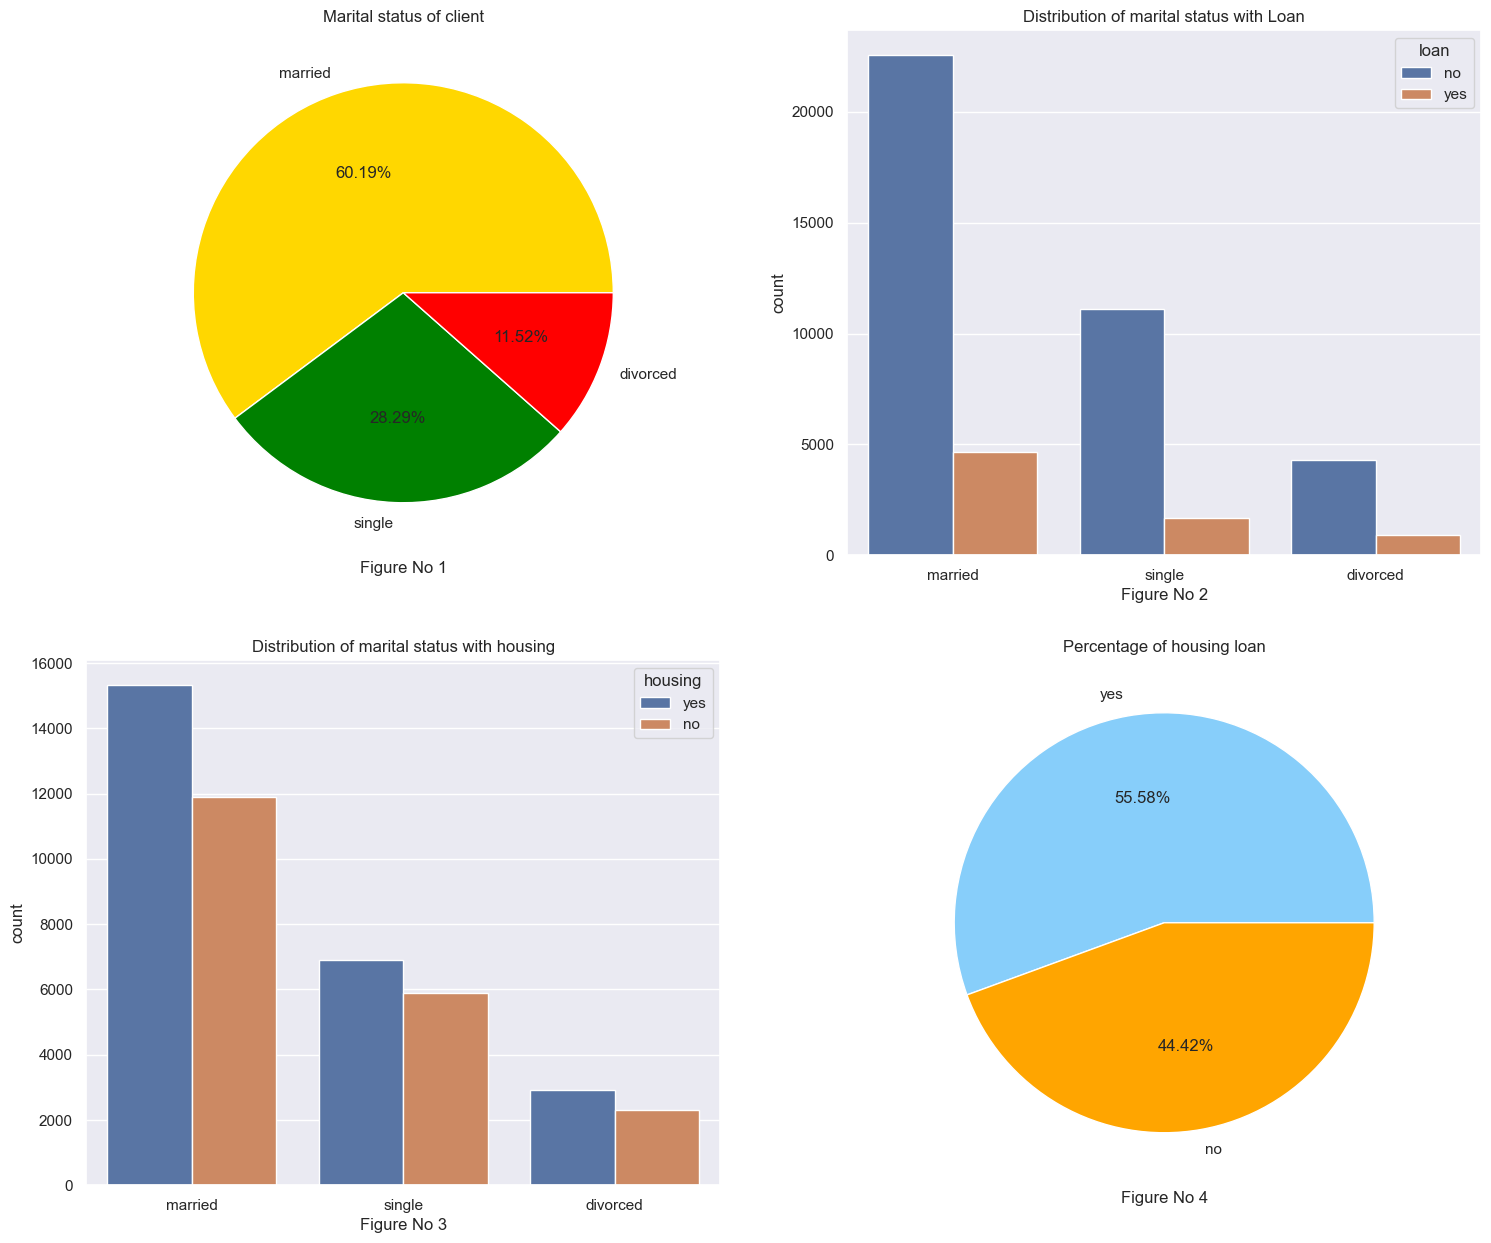

In [67]:
plt.subplots(2,2,figsize=(18,15))

plt.subplot(2,2,1)
plt.pie(x=Client_data["marital"].value_counts(),labels=Client_data["marital"].value_counts().index,autopct='%0.2f%%',colors=['gold','green','red'],data=df)
plt.title('Marital status of client')
plt.xlabel("Figure No 1")

plt.subplot(2,2,2)
sns.countplot(x="marital",data=Client_data,hue="loan")
plt.title("Distribution of marital status with Loan")
plt.xlabel("Figure No 2")

plt.subplot(2,2,3)
sns.countplot(x="marital",data=Client_data,hue="housing")
plt.title("Distribution of marital status with housing")
plt.xlabel("Figure No 3")

plt.subplot(2,2,4)
plt.pie(x=Client_data["housing"].value_counts(),labels=Client_data["housing"].value_counts().index,autopct='%0.2f%%',colors=['lightskyblue','orange'],data=df)
plt.title('Percentage of housing loan')
plt.xlabel("Figure No 4")

- In figure no 1, the 60.19% are married client, 28.29% are single client and 11.52% are divorced client.
- As per above analysis the percentage of married clients is much higher who have done their fix deposit as well as taken
  housing loan as compare to other clients.
- When we Compare between Figure no 2 and Figure no 3, the count value of housing loan is higher but fixed deposit loan 
  is lower of married client. Respectively same for single and divorced client.
- In Figure no 4, Out of 100%, 55.58% of clients who have housing loan.

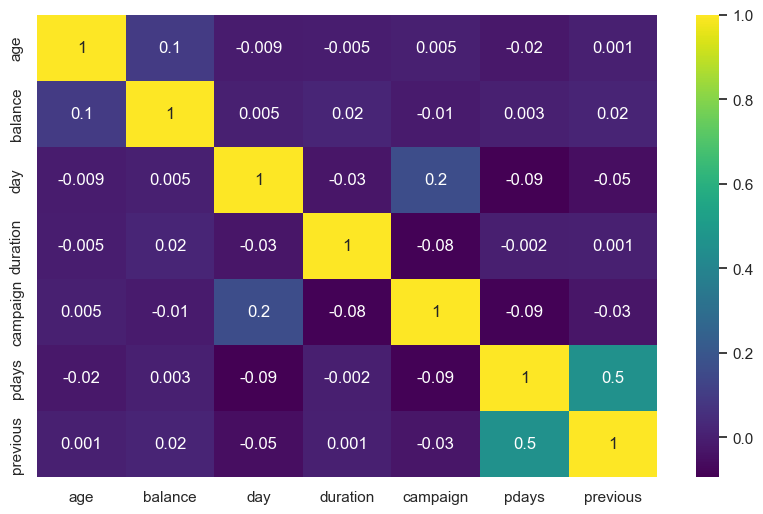

In [68]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(Client_data.corr(),annot=True,cmap='viridis',fmt='.1g',cbar=True)

plt.show()

In [ ]:
# Conclusion

